# 梯度下降和随机梯度下降 --- 从0开始


在之前的教程里，我们通过损失函数$\mathcal{L}$中参数的梯度$\nabla_{\theta}\mathcal{L}$来决定如何更新模型$\theta$的参数。我们也提到过学习率$\eta$，并给出了使用梯度下降算法更新模型参数的步骤：

$$\theta_{t} \gets \theta_{t-1} - \eta \nabla_{\theta}\mathcal{L}_{t-1}$$

在本节教程中，我们将详细介绍梯度下降算法和随机梯度下降算法。由于梯度下降是优化算法的核心部分，深刻理解梯度的意义十分重要。为了帮助大家深刻理解梯度，我们将从数学上阐释梯度下降的意义。



## 一维梯度下降
我们先以简单的一维梯度下降为例，解释梯度下降算法可以降低目标函数值的原因。一维梯度是一个标量，也称导数。

假设函数$f: \mathbb{R} \rightarrow \mathbb{R}$的输入和输出都是标量。根据泰勒展开公式，我们得到

$$f(x + \epsilon) \approx f(x) + f'(x) \epsilon$$

假设$\eta$是一个常数，将$\epsilon$替换为$-\eta f'(x)$后，我们有

$$f(x - \eta f'(x)) \approx f(x) -  \eta f'(x)^2$$

如果$\eta$是一个很小的正数，那么

$$f(x - \eta f'(x)) \leq f(x)$$

也就是说，如果当前导数$f'(x) \neq 0$，按照$x := x - \eta f'(x)$更新$x$可能降低$f(x)$的值。

由于导数$f'(x)$是梯度在一维空间的特殊情况，上述更新$x$的方法也即一维空间的梯度下降。一维空间的梯度下降如下图所示，参数$x$沿着梯度方向不断更新。

![](../img/gd.png)





## 学习率

上述梯度下降算法中的$\eta$（取正数）叫做学习率或步长。需要注意的是，学习率过大可能会造成$x$迈过（overshoot）最优解，甚至不断发散而无法收敛，如下图所示。

![](../img/overshoot.png)

然而，如果学习率过小，优化算法收敛速度会过慢。实际中，一个合适的学习率通常是需要通过实验调出来的。



## 多维梯度下降

现在我们考虑一个更广义的情况：目标函数的输入为向量，输出为标量。

假设目标函数$f: \mathbb{R}^d \rightarrow \mathbb{R}$的输入是一个多维向量$\mathbf{x} = [x_1, x_2, \ldots, x_d]^\top$。目标函数$f(\mathbf{x})$有关$\mathbf{x}$的梯度是一个由偏导数组成的向量：

$$\nabla_\mathbf{x} f(\mathbf{x}) = \bigg[\frac{\partial f(\mathbf{x})}{\partial x_1}, \frac{\partial f(\mathbf{x})}{\partial x_2}, \ldots, \frac{\partial f(\mathbf{x})}{\partial x_d}\bigg]^\top.$$


为表示简洁，我们有时用$\nabla f(\mathbf{x})$代替$\nabla_\mathbf{x} f(\mathbf{x})$。梯度中每个偏导数元素$\partial f(\mathbf{x})/\partial x_i$代表着$f$在$\mathbf{x}$有关输入$x_i$的变化率。为了测量$f$沿着单位向量$\mathbf{u}$方向上的变化率，在多元微积分中，我们定义$f$在$\mathbf{x}$上沿着$\mathbf{u}$方向的方向导数为

$$D_\mathbf{u} f(\mathbf{x}) = \lim_{h \rightarrow 0}  \frac{f(\mathbf{x} + h \mathbf{u}) - f(\mathbf{x})}{h}$$

由链式法则，该方向导数可以改写为

$$D_\mathbf{u} f(\mathbf{x}) = \nabla f(\mathbf{x}) \cdot \mathbf{u}$$

方向导数$D_\mathbf{u} f(\mathbf{x})$给出了$f$在$\mathbf{x}$上沿着所有可能方向的变化率。为了最小化$f$，我们希望找到$f$能被降低最快的方向。因此，我们可以通过$\mathbf{u}$来最小化方向导数$D_\mathbf{u} f(\mathbf{x})$。

由于$D_\mathbf{u} f(\mathbf{x}) = \|\nabla f(\mathbf{x})\| \cdot \|\mathbf{u}\|  \cdot \text{cos} (\theta) = \|\nabla f(\mathbf{x})\|  \cdot \text{cos} (\theta)$，
其中$\theta$为$\nabla f(\mathbf{x})$和$\mathbf{u}$之间的夹角，当$\theta = \pi$，$\text{cos}(\theta)$取得最小值-1。因此，当$\mathbf{u}$在梯度方向$\nabla f(\mathbf{x})$的相反方向时，方向导数$D_\mathbf{u} f(\mathbf{x})$被最小化。所以，我们可能通过下面的**梯度下降算法**来不断降低目标函数$f$的值：

$$\mathbf{x} := \mathbf{x} - \eta \nabla f(\mathbf{x})$$

相同地，其中$\eta$（取正数）称作学习率或步长。


## 随机梯度下降

然而，当训练数据集很大时，梯度下降算法可能会难以使用。为了解释这个问题，考虑目标函数

$$f(\mathbf{x}) = \frac{1}{n} \sum_{i = 1}^n f_i(\mathbf{x}),$$

其中$f_i(\mathbf{x})$是有关索引为$i$的训练数据点的损失函数。需要强调的是，梯度下降每次迭代的计算开销随着$n$线性增长。因此，当$n$很大时，每次迭代的计算开销很高。

这时我们需要**随机梯度下降**算法。在每次迭代时，该算法随机均匀采样$i$并计算$\nabla f_i(\mathbf{x})$。事实上，随机梯度$\nabla f_i(\mathbf{x})$是对梯度$\nabla f(\mathbf{x})$的无偏估计：

$$\mathbb{E}_i \nabla f_i(\mathbf{x}) = \frac{1}{n} \sum_{i = 1}^n \nabla f_i(\mathbf{x}) = \nabla f(\mathbf{x})$$




## 小批量随机梯度下降


广义上，每次迭代可以随机均匀采样一个由训练数据点索引所组成的小批量$\mathcal{B}$。类似地，我们可以使用

$$\nabla f_\mathcal{B}(\mathbf{x}) = \frac{1}{|\mathcal{B}|} \sum_{i \in \mathcal{B}}\nabla f_i(\mathbf{x})$$ 

来更新$\mathbf{x}$：

$$\mathbf{x} := \mathbf{x} - \eta \nabla f_\mathcal{B}(\mathbf{x}),$$

其中$|\mathcal{B}|$代表批量中索引数量，$\eta$（取正数）称作学习率或步长。同样，小批量随机梯度$\nabla f_\mathcal{B}(\mathbf{x})$也是对梯度$\nabla f(\mathbf{x})$的无偏估计:

$$\mathbb{E}_\mathcal{B} \nabla f_\mathcal{B}(\mathbf{x}) = \nabla f(\mathbf{x}).$$

这个算法叫做**小批量随机梯度下降**。该算法每次迭代的计算开销为$\mathcal{O}(|\mathcal{B}|)$。因此，当批量较小时，每次迭代的计算开销也较小。



## 算法实现和实验

我们只需要实现小批量随机梯度下降。当批量大小等于训练集大小时，该算法即为梯度下降；批量大小为1即为随机梯度下降。


In [1]:
# 小批量随机梯度下降。
def sgd(params, lr, batch_size):
    for param in params:
        param[:] = param - lr * param.grad / batch_size

实验中，我们以线性回归为例。其中真实参数`w`为[2, -3.4]，`b`为4.2。



In [2]:
import mxnet as mx 
from mxnet import autograd
from mxnet import ndarray as nd 
from mxnet import gluon 
import random 
mx.random.seed(1) 
random.seed(1) 
# 生成数据集。
num_inputs=2
num_examples=1000
true_w=[2,-3.4]
true_b=4.2 
X=nd.random_normal(scale=1,shape=(num_examples,num_inputs)) 
y=true_w[0]*X[:,0]+true_w[1]*X[:,1]+true_b 
y+=0.01*nd.random_normal(scale=1,shape=y.shape) 
dataset=gluon.data.ArrayDataset(X,y) 
# 构造迭代器
import random 
def data_iter(batch_size):
    idx=list(range(num_examples))
    random.shuffle(idx)
    for batch_i,i in enumerate(range(0,num_examples,batch_size)):
        j=nd.array(idx[i:min(i+batch_size,num_examples)])
        yield batch_i,X.take(j),y.take(j) 
#初始模型参数 
def init_params():
    w=nd.random_normal(scale=1,shape=(num_inputs,1)) 
    b=nd.zeros(shape=(1,))
    params=[w,b]
    for param in params:
        param.attach_grad() 
    return params 
# 线性回归模型.
def net(X,w,b):
    return nd.dot(X,w)+b 
# 损失函数 

def square_loss(yhat,y):
    return (yhat-y.reshape(yhat.shape))**2 /2 


接下来定义训练函数。当epoch大于2时（epoch从1开始计数），学习率以自乘0.1的方式自我衰减。训练函数的period参数说明，每次采样过该数目的数据点后，记录当前目标函数值用于作图。例如，当period和batch_size都为10时，每次迭代后均会记录目标函数值。



In [3]:
%matplotlib inline 
import matplotlib as mpl 
from mxnet import autograd 
mpl.rcParams['figure.dpi']=120
import matplotlib.pyplot as plt 
import numpy as np 
def train(batch_size,lr,epochs,period):
    assert period>=batch_size and period%batch_size==0
    w,b=init_params() 
    total_loss=[np.mean(square_loss(net(X,w,b),y).asnumpy())]
    # 注意epoch 从1开始计数 
    for epoch in range(1,epochs+1):
        # 学习率自我衰减 
        if epoch>2:
            lr*=0.1 
        for batch_i,data,label in data_iter(batch_size):
            with autograd.record():
                output=net(data,w,b)
                loss=square_loss(output,label)
            loss.backward()
            sgd([w,b],lr,batch_size) 
            if batch_i*batch_size%period==0:
                total_loss.append(
                    np.mean(square_loss(net(X,w,b),y).asnumpy()))
        print("Batch size %d,learning rate %f,Epoch %d ,loss %.4e"%
             (batch_size,lr,epoch,total_loss[-1]))
    print('w:',np.reshape(w.asnumpy(),(1,-1)),
         'b:',b.asnumpy()[0],'\n') 
    x_axis=np.linspace(0,epochs,len(total_loss),endpoint=True) 
    plt.semilogy(x_axis,total_loss) 
    plt.xlabel('epoch') 
    plt.ylabel('loss') 
    plt.show()
    

当批量大小为1时，训练使用的是随机梯度下降。在当前学习率下，目标函数值在早期快速下降后略有波动。当epoch大于2，学习率自我衰减后，目标函数值下降后较平稳。最终学到的参数值与真实值较接近。

Batch size 1,learning rate 0.200000,Epoch 1 ,loss 6.5111e-05
Batch size 1,learning rate 0.200000,Epoch 2 ,loss 8.4869e-05
Batch size 1,learning rate 0.020000,Epoch 3 ,loss 4.8941e-05
w: [[ 2.0012236 -3.4004235]] b: 4.201426 



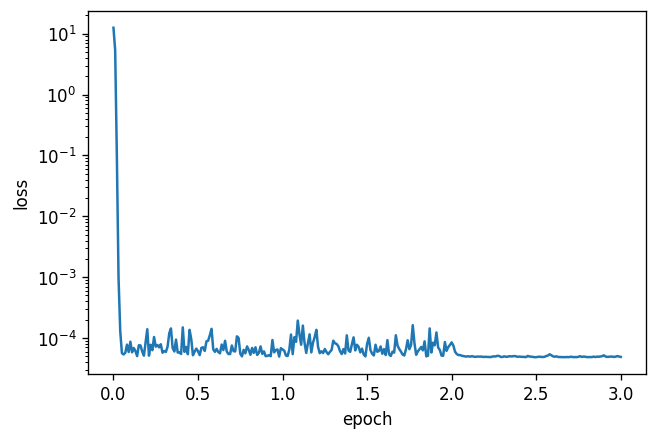

In [4]:
train(batch_size=1, lr=0.2, epochs=3, period=10)


当批量大小为1000时，由于训练数据集含1000个样本，此时训练使用的是梯度下降。在当前学习率下，目标函数值在前两个epoch下降较快。当epoch大于2，学习率自我衰减后，目标函数值下降较慢。最终学到的参数值与真实值较接近。



Batch size 1000,learning rate 0.999000,Epoch 1 ,loss 2.8226e-03
Batch size 1000,learning rate 0.999000,Epoch 2 ,loss 7.6969e-05
Batch size 1000,learning rate 0.099900,Epoch 3 ,loss 7.2206e-05
w: [[ 1.9932858 -3.4018967]] b: 4.199963 



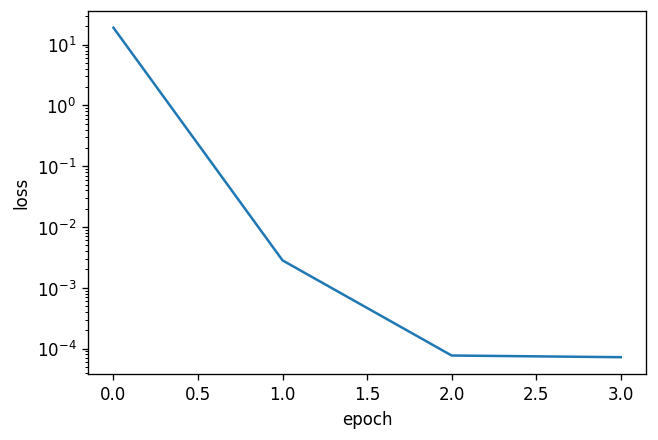

In [5]:
train(batch_size=1000,lr=0.999,epochs=3,period=1000)

当批量大小为10时，由于训练数据集含1000个样本，此时训练使用的是小批量随机梯度下降。最终学到的参数值与真实值较接近。



Batch size 10,learning rate 0.200000,Epoch 1 ,loss 4.9146e-05
Batch size 10,learning rate 0.200000,Epoch 2 ,loss 4.8791e-05
Batch size 10,learning rate 0.020000,Epoch 3 ,loss 4.8380e-05
w: [[ 1.999952  -3.3992388]] b: 4.2007875 



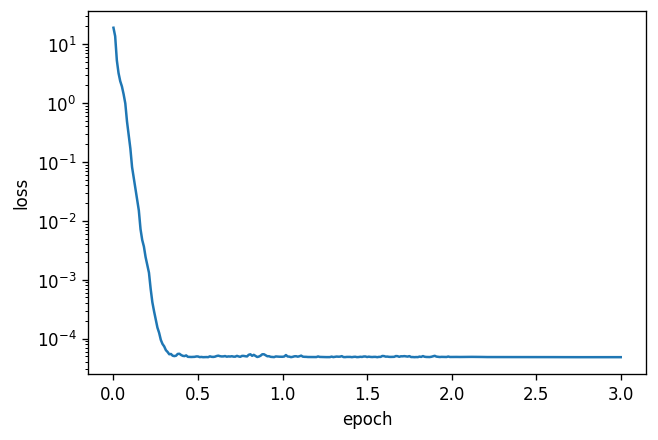

In [6]:
train(batch_size=10, lr=0.2, epochs=3, period=10)



同样是批量大小为10，我们把学习率改大。这时我们观察到目标函数值不断增大。这时典型的overshooting问题。



/home/dske/anaconda3/envs/gluon/lib/python3.6/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


Batch size 10,learning rate 5.000000,Epoch 1 ,loss nan
Batch size 10,learning rate 5.000000,Epoch 2 ,loss nan
Batch size 10,learning rate 0.500000,Epoch 3 ,loss nan
w: [[nan nan]] b: nan 



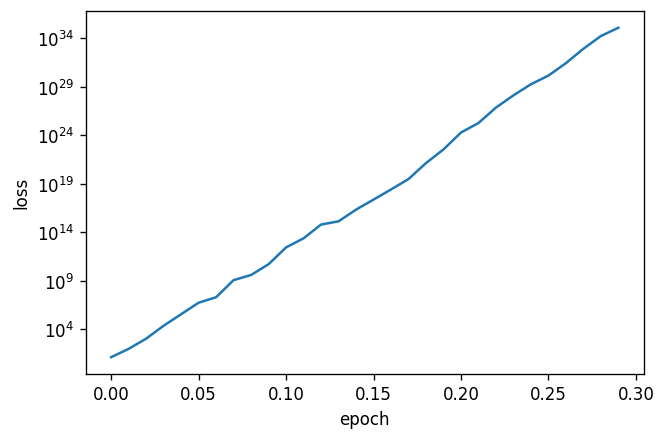

In [7]:
train(batch_size=10, lr=5, epochs=3, period=10)



同样是批量大小为10，我们把学习率改小。这时我们观察到目标函数值下降较慢，直到3个epoch也没能得到接近真实值的解。



Batch size 10,learning rate 0.002000,Epoch 1 ,loss 1.0582e+01
Batch size 10,learning rate 0.002000,Epoch 2 ,loss 7.1162e+00
Batch size 10,learning rate 0.000200,Epoch 3 ,loss 6.8397e+00
w: [[ 0.27345622 -1.6173007 ]] b: 1.4296776 



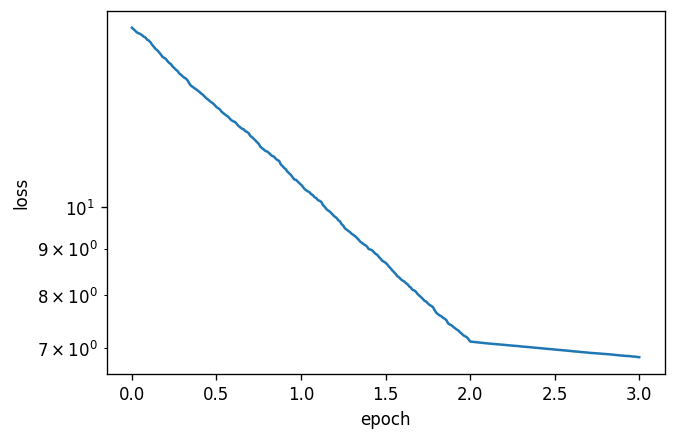

In [8]:
train(batch_size=10, lr=0.002, epochs=3, period=10)


## 结论

* 当训练数据较大，梯度下降每次迭代计算开销较大，因而（小批量）随机梯度下降更受青睐。
* 学习率过大过小都有问题。合适的学习率要靠实验来调。


## 练习

* 为什么实验中随机梯度下降的学习率是自我衰减的？
* 梯度下降和随机梯度下降虽然看上去有效，但可能会有哪些问题？


**吐槽和讨论欢迎点**[这里](https://discuss.gluon.ai/t/topic/1877)



Batch size 10,learning rate 0.200000,Epoch 1 ,loss 4.8515e-05
Batch size 10,learning rate 0.200000,Epoch 2 ,loss 4.9125e-05
Batch size 10,learning rate 0.020000,Epoch 3 ,loss 4.8390e-05
Batch size 10,learning rate 0.002000,Epoch 4 ,loss 4.8365e-05
Batch size 10,learning rate 0.000200,Epoch 5 ,loss 4.8363e-05
Batch size 10,learning rate 0.000020,Epoch 6 ,loss 4.8363e-05
Batch size 10,learning rate 0.000002,Epoch 7 ,loss 4.8363e-05
Batch size 10,learning rate 0.000000,Epoch 8 ,loss 4.8363e-05
Batch size 10,learning rate 0.000000,Epoch 9 ,loss 4.8363e-05
w: [[ 2.0000122 -3.3992727]] b: 4.200743 



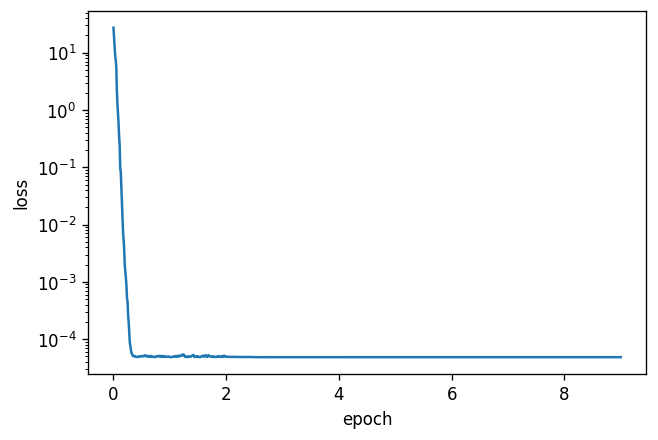

In [9]:
train(batch_size=10, lr=0.2, epochs=9, period=10)